In [ ]:
# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# If this prints 0, and you are on Mac, un-comment the next line:
# !pip install tensorflow-metal

In [15]:
# --- DEFINITIVE GPU CONFIRMATION ---

# 1. Turn on Device Placement Logging
# This will print the device used for every operation to the output/console.
tf.debugging.set_log_device_placement(True)

# 2. Run a simple calculation
try:
    print("Running matrix multiplication...")
    with tf.device('/GPU:0'):
        a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
        b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
        c = tf.matmul(a, b)
        print("\nResult:\n", c)
        print("\nSUCCESS: Operation ran on GPU:0")
except RuntimeError as e:
    print("\nERROR: GPU not found or failed:", e)

# 3. Turn off logging to avoid spamming the training loop output later
tf.debugging.set_log_device_placement(False)

Running matrix multiplication...

Result:
 tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)

SUCCESS: Operation ran on GPU:0


In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = '/Users/aditya/Desktop/Kaggle/catdog/prepared_data'

train_dir = os.path.join(BASE_DIR, 'train')
validation_dir = os.path.join(BASE_DIR, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print(f"Contents of base directory: {os.listdir(BASE_DIR)}")

print(f"\nContents of train directory: {os.listdir(train_dir)}")

print(f"\nContents of validation directory: {os.listdir(validation_dir)}")

Contents of base directory: ['.DS_Store', 'train', 'validation']

Contents of train directory: ['dogs', 'cats', '.DS_Store']

Contents of validation directory: ['dogs', 'cats', '.DS_Store']


In [3]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode="binary",
    shuffle=True
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode="binary",
    shuffle=True
)

SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_dataset = validation_dataset.prefetch(PREFETCH_BUFFER_SIZE)

Found 22546 files belonging to 2 classes.
Found 2454 files belonging to 2 classes.


In [16]:
EPOCHS = 20

model = create_model()

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset,
    verbose=2
)

Epoch 1/20
1128/1128 - 109s - 97ms/step - accuracy: 0.6033 - loss: 1.1010 - val_accuracy: 0.6361 - val_loss: 0.6786
Epoch 2/20
1128/1128 - 108s - 96ms/step - accuracy: 0.7420 - loss: 0.5286 - val_accuracy: 0.8280 - val_loss: 0.4029
Epoch 3/20
1128/1128 - 108s - 96ms/step - accuracy: 0.8056 - loss: 0.4296 - val_accuracy: 0.8419 - val_loss: 0.3741
Epoch 4/20
1128/1128 - 109s - 97ms/step - accuracy: 0.8317 - loss: 0.3912 - val_accuracy: 0.7673 - val_loss: 0.8203
Epoch 5/20
1128/1128 - 107s - 95ms/step - accuracy: 0.8386 - loss: 0.3830 - val_accuracy: 0.8227 - val_loss: 0.4586
Epoch 6/20
1128/1128 - 107s - 95ms/step - accuracy: 0.8523 - loss: 0.3538 - val_accuracy: 0.8541 - val_loss: 0.4325
Epoch 7/20
1128/1128 - 105s - 93ms/step - accuracy: 0.8496 - loss: 0.3522 - val_accuracy: 0.8293 - val_loss: 0.4025
Epoch 8/20
1128/1128 - 110s - 97ms/step - accuracy: 0.8602 - loss: 0.3551 - val_accuracy: 0.8659 - val_loss: 0.3204
Epoch 9/20
1128/1128 - 110s - 97ms/step - accuracy: 0.8622 - loss: 0.346

In [17]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

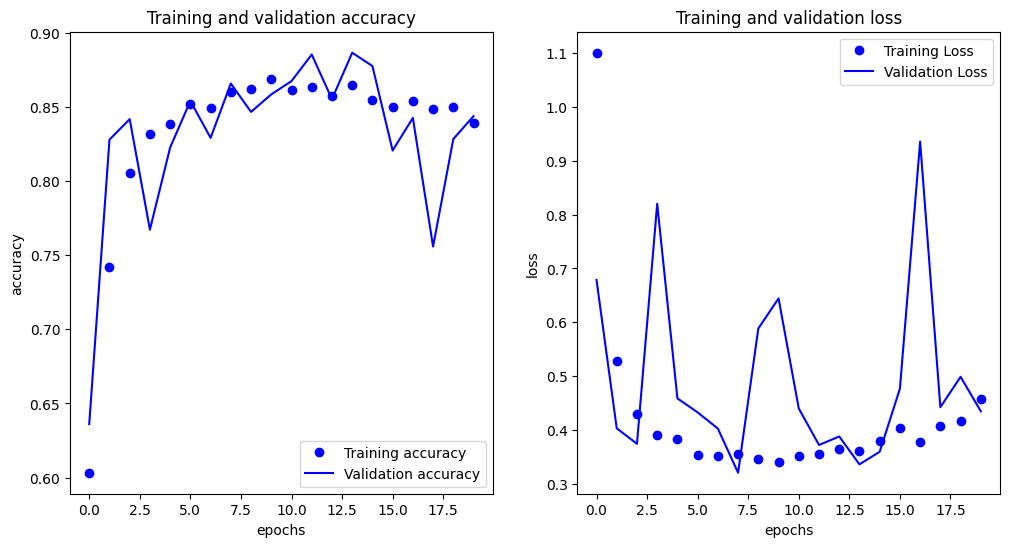

In [18]:
# Plot training results
plot_loss_acc(history)

In [19]:
# Define fill mode.
FILL_MODE = 'nearest'

# Create the augmentation model.
data_augmentation = tf.keras.Sequential([
    # Specify the input shape.
    tf.keras.Input(shape=(150,150,3)),
    # Add the augmentation layers
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomTranslation(0.2,0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.2, fill_mode=FILL_MODE)
    ])

In [20]:
def demo_augmentation(sample_image, model, num_aug):
    '''Takes a single image array, then uses a model to generate num_aug transformations'''

    # Instantiate preview list
    image_preview = []

    # Convert input image to a PIL image instance
    sample_image_pil = tf.keras.utils.array_to_img(sample_image)

    # Append the result to the list
    image_preview.append(sample_image_pil)

    # Apply the image augmentation and append the results to the list
    for i in range(NUM_AUG):
        sample_image_aug = model(tf.expand_dims(sample_image, axis=0))
        sample_image_aug_pil = tf.keras.utils.array_to_img(tf.squeeze(sample_image_aug))
        image_preview.append(sample_image_aug_pil)

    # Instantiate a subplot
    fig, axes = plt.subplots(1, NUM_AUG + 1, figsize=(12, 12))

    # Preview the images.
    for index, ax in enumerate(axes):
        ax.imshow(image_preview[index])
        ax.set_axis_off()

        if index == 0:
            ax.set_title('original')
        else:
            ax.set_title(f'augment {index}')

In [21]:
# Get a batch of images
sample_batch = list(train_dataset.take(1))[0][0]
print(f'images per batch: {len(sample_batch)}')

images per batch: 20


2026-01-24 12:20:40.581321: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


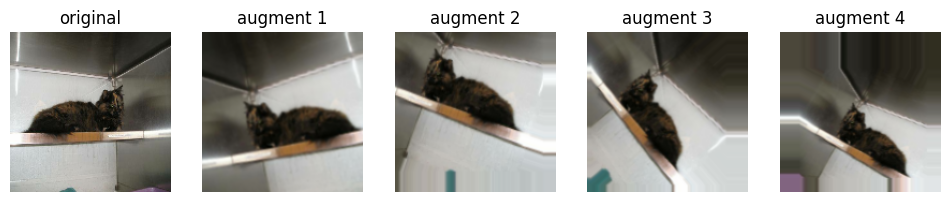

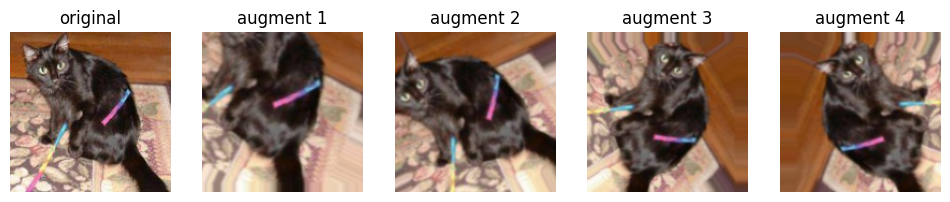

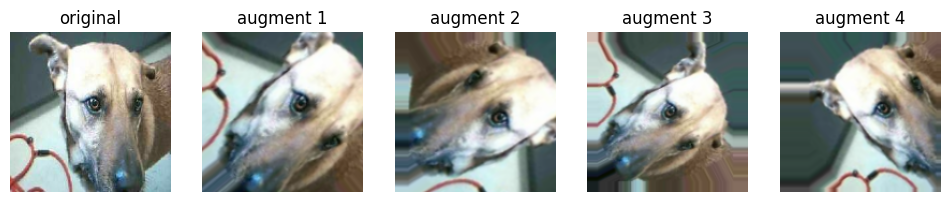

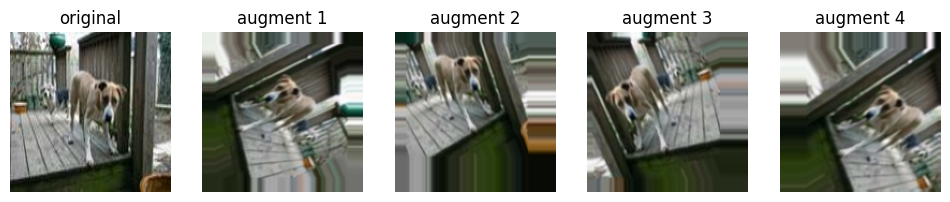

In [22]:
NUM_AUG = 4

# Apply the transformations to the first 4 images
demo_augmentation(sample_batch[0], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[1], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[2], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[3], data_augmentation, NUM_AUG)

# Uncomment the line below to delete the variable to free up some memory
# del sample_batch

In [23]:
# Instantiate the base model
model_without_aug = create_model()

# Prepend the data augmentation layers to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model_without_aug
])

# Compile the model
model_with_aug.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])

In [25]:
EPOCHS=8

# Train the new model
history_with_aug = model_with_aug.fit(
      train_dataset,
      epochs=EPOCHS,
      validation_data=validation_dataset,
      verbose=2)

Epoch 1/8
1128/1128 - 114s - 101ms/step - accuracy: 0.5648 - loss: 0.7889 - val_accuracy: 0.6222 - val_loss: 0.6416
Epoch 2/8
1128/1128 - 113s - 100ms/step - accuracy: 0.6371 - loss: 0.6410 - val_accuracy: 0.6491 - val_loss: 0.6198
Epoch 3/8
1128/1128 - 116s - 103ms/step - accuracy: 0.6589 - loss: 0.6171 - val_accuracy: 0.6165 - val_loss: 0.6795
Epoch 4/8
1128/1128 - 114s - 101ms/step - accuracy: 0.6816 - loss: 0.5973 - val_accuracy: 0.7567 - val_loss: 0.5137
Epoch 5/8
1128/1128 - 113s - 101ms/step - accuracy: 0.6966 - loss: 0.5763 - val_accuracy: 0.7408 - val_loss: 0.5295
Epoch 6/8
1128/1128 - 115s - 102ms/step - accuracy: 0.7091 - loss: 0.5649 - val_accuracy: 0.7449 - val_loss: 0.5143
Epoch 7/8
1128/1128 - 114s - 101ms/step - accuracy: 0.7233 - loss: 0.5438 - val_accuracy: 0.7897 - val_loss: 0.4489
Epoch 8/8
1128/1128 - 113s - 100ms/step - accuracy: 0.7389 - loss: 0.5246 - val_accuracy: 0.8036 - val_loss: 0.4277


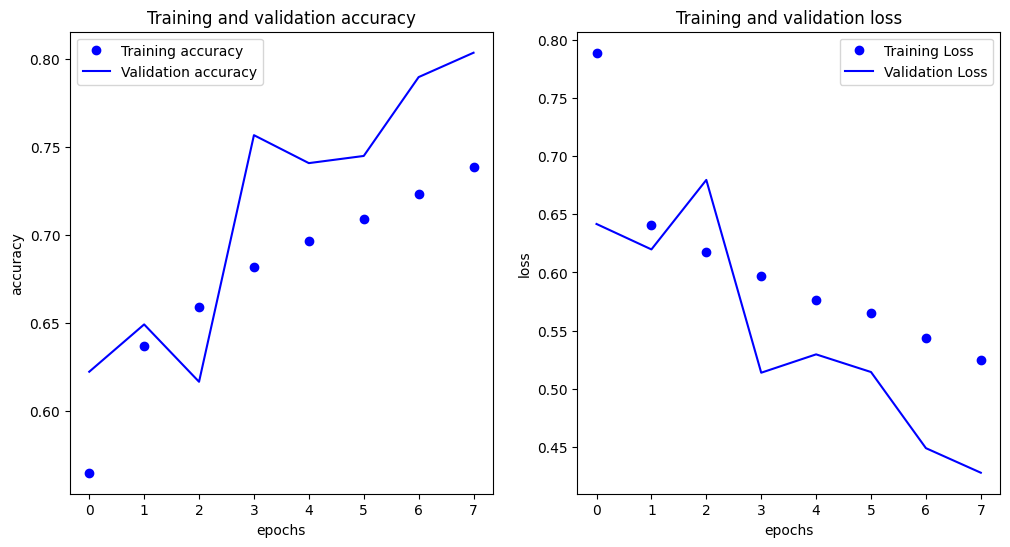

In [26]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)